# The objective of this case study is to use EDA to identify applicants capable of repaying loans, thereby preventing their rejection.

### Importing essential Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Reading the application_data Dataframe

In [2]:
# Reading data from application_data and printing first 5 rows

df_app = pd.read_csv('application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Reading the previous_application Dataframe

In [3]:
# Reading data from previous_application and printing first 5 rows

df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Shape of application_data Dataframe

In [4]:
# Shape of application_data dataframe

df_app.shape

(307511, 122)

### Shape of previous_application Dataframe

In [5]:
# Shape of previous_application dataframe

df_prev.shape

(1670214, 37)

### Column names

In [6]:
# Printing all the column names present in application_data dataframe

df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Data Cleaning for application_data Dataframe

In [7]:
# Calculating sum of null values in all the columns in percentage

null_df_app = df_app.isna().sum()/len(df_app) *100
print(null_df_app.sort_values(ascending=False))

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Droppring all the columns where null values are more than 40%

In [8]:
# Finding columns with null data more than 40%

drop_pct = 40
dropped_columns_lt_40pct = null_df_app[null_df_app > drop_pct].index
len(dropped_columns_lt_40pct)

49

In [9]:
# Dropping columns with more than 40% null data

df_app2 = df_app.drop(dropped_columns_lt_40pct,axis=1)
df_app2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Shape of dataframe after dropping columns with more than 40% null data

df_app2.shape

(307511, 73)

In [11]:
# Column names of dataframe after dropping columns with more than 40% null data

df_app2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### Dropping columns from the dataframe which are not important for analytics

In [12]:
# Selecting columns that are less important for solving the problem statement and dropping them

dropped_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'EXT_SOURCE_2','EXT_SOURCE_3',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                   'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                   'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
                   'FLAG_DOCUMENT_21']

df_app3 = df_app2.drop(dropped_columns,axis=1)
df_app3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Shape of final dataframe

df_app3.shape

(307511, 44)

### Checking sum of null values present in all the columns

In [14]:
# Checking the sum of null data present in all the columns of dataframe and sorting them

df_app3.isna().sum().sort_values(ascending=True)

SK_ID_CURR                         0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
DAYS_ID_PUBLISH                    0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
DAYS_REGISTRATION                  0
NAME_FAMILY_STATUS                 0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_HOUSING_TYPE                  0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
N

### Imputing null values with mean and mode

In [15]:
# Finding mean of 'DAYS_LAST_PHONE_CHANGE' column

df_app3['DAYS_LAST_PHONE_CHANGE'].mean()

-962.8587883320868

In [16]:
# Head of 'DAYS_LAST_PHONE_CHANGE' column

df_app3['DAYS_LAST_PHONE_CHANGE'].head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [17]:
# Imputing null values with mean in 'DAYS_LAST_PHONE_CHANGE' column

df_app3['DAYS_LAST_PHONE_CHANGE'].fillna(962,inplace=True)

In [18]:
# Checking presence of any null values in 'DAYS_LAST_PHONE_CHANGE' column

df_app3['DAYS_LAST_PHONE_CHANGE'].isna().sum().any()

False

In [19]:
# Finding mode of 'CNT_FAM_MEMBERS' column

df_app3['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [20]:
# Head of 'DAYS_LAST_PHONE_CHANGE' column

df_app3['CNT_FAM_MEMBERS'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [21]:
# Grouping the 'CNT_FAM_MEMBERS' column by category size and sorting them

df_app3.groupby('CNT_FAM_MEMBERS').size().sort_values(ascending=False)

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
12.0         2
14.0         2
16.0         2
20.0         2
11.0         1
13.0         1
15.0         1
dtype: int64

In [22]:
# Imputing null values with mode in 'CNT_FAM_MEMBERS' column

df_app3['CNT_FAM_MEMBERS'].fillna(2,inplace=True)

In [23]:
# Checking presence of any null values in 'CNT_FAM_MEMBERS' column

df_app3['CNT_FAM_MEMBERS'].isna().sum().any()

False

In [24]:
# Finding mean of 'AMT_ANNUITY' column

df_app3['AMT_ANNUITY'].mean()

27108.573909183444

In [25]:
# Head of 'AMT_ANNUITY' column

df_app3['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [26]:
# Imputing null values with mean in 'AMT_ANNUITY' column

df_app3['AMT_ANNUITY'].fillna(27108.5,inplace=True)

In [27]:
# Checking presence of any null values in 'AMT_ANNUITY' column

df_app3['AMT_ANNUITY'].isna().sum().any()

False

In [28]:
# Finding mean of 'AMT_GOODS_PRICE' column

df_app3['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [29]:
# Head of 'AMT_GOODS_PRICE' column

df_app3['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [30]:
# Imputing null values with mean in 'AMT_GOODS_PRICE' column

df_app3['AMT_GOODS_PRICE'].fillna(538396.0,inplace=True)

In [31]:
# Checking presence of any null values in 'AMT_GOODS_PRICE' column

df_app3['AMT_GOODS_PRICE'].isna().sum().any()

False

In [32]:
# Finding mode of 'OBS_30_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [33]:
# Head of 'OBS_30_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [34]:
# Grouping the 'OBS_30_CNT_SOCIAL_CIRCLE' column by category size and sorting them

df_app3.groupby('OBS_30_CNT_SOCIAL_CIRCLE').size().sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
dtype: int64

In [35]:
# Imputing null values with mode in 'OBS_30_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)

In [36]:
# Checking presence of any null values in 'OBS_30_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum().any()

False

In [37]:
# Finding mode of 'DEF_30_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [38]:
# Head of 'DEF_30_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [39]:
# Imputing null values with mode in 'DEF_30_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)

In [40]:
# Checking presence of any null values in 'DEF_30_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum().any()

False

In [41]:
# Finding mode of 'OBS_60_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [42]:
# Head of 'OBS_60_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_60_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [43]:
# Imputing null values with mode in 'OBS_60_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)

In [44]:
# Checking presence of any null values in 'OBS_60_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum().any()

False

In [45]:
# Finding mode of 'DEF_60_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [46]:
# Head of 'DEF_60_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_60_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [47]:
# Imputing null values with mode in 'OBS_60_CNT_SOCIAL_CIRCLE' column

df_app3['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)

In [48]:
# Checking presence of any null values in 'OBS_60_CNT_SOCIAL_CIRCLE' column

df_app3['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum().any()

False

In [49]:
# Head of 'NAME_TYPE_SUITE' column

df_app3['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [50]:
# Grouping the 'NAME_TYPE_SUITE' column by category size and sorting them in descending

df_app3.groupby(df_app3['NAME_TYPE_SUITE']).size().sort_values(ascending=False)

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
dtype: int64

In [51]:
# Imputing null values with 'Unaccompanied' in 'NAME_TYPE_SUITE' column

df_app3['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [52]:
# Checking presence of any null values in 'NAME_TYPE_SUITE' column

df_app3['NAME_TYPE_SUITE'].isna().sum().any()

False

In [53]:
# Head of 'OCCUPATION_TYPE' column

df_app3['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [54]:
# Grouping the 'OCCUPATION_TYPE' column by category size and sorting them in descending

df_app3.groupby(df_app3['OCCUPATION_TYPE']).size().sort_values(ascending=False)

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
dtype: int64

In [55]:
# Imputing null values with 'Laborers' in 'OCCUPATION_TYPE' column

df_app3['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [56]:
# Checking presence of any null values in 'OCCUPATION_TYPE' column

df_app3['OCCUPATION_TYPE'].isna().sum().any()

False

In [57]:
# Printing the remaining columns with null values

df_app3.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
R

In [58]:
# Finding mode of remaining columns with null values

df_app3[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].mode()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Imputing null values with modes in remaining columns

df_app3['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0,inplace=True)
df_app3['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.0,inplace=True)
df_app3['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.0,inplace=True)
df_app3['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.0,inplace=True)
df_app3['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.0,inplace=True)
df_app3['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0.0,inplace=True)

In [60]:
# Checking presence of any null values in dataframe after data imputation

df_app3.isna().sum().any()

False

In [61]:
col_days = []

for col in df_app3.columns:
    if col.startswith('DAYS'):
        col_days.append(col)

col_days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [62]:
df_app3[col_days] = df_app3[col_days].abs()

In [63]:
# Head of final dataframe

df_app3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking Duplicate data in the dataframe

In [64]:
# Duplicate Data

df_app3.duplicated().sum()

0

### Information of the dataframe

In [65]:
# Info of the dataframe

df_app3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Checking Unique data values in the dataframe

In [66]:
# Checking number of unique values in each column and sorting in descending

df_app3.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1003
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
NAME_INCOME_TYPE                    8
NAME_TYPE_SU

### Statistics of the dataframe

In [67]:
# Statistics of the dataframe 

df_app3.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573906,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.417523,0.142944,1.400626,0.099717,962.858786,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.398395,0.446033,2.377224,0.361735,826.807143,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Creating BINS

In [68]:
df_app3['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000]
range = ['0-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','500k and above']
df_app3['AMT_INCOME_RANGE'] = pd.cut(df_app3['AMT_INCOME_TOTAL'],bins=bins,labels=range) 

In [70]:
df_app3.groupby(['AMT_INCOME_RANGE']).size()

AMT_INCOME_RANGE
0-100k            63698
100k-150k         91591
150k-200k         64307
200k-250k         48137
250k-300k         17039
300k-350k          8874
350k-400k          5802
400k-450k          4924
450k-500k           437
500k and above      835
dtype: int64

In [71]:
df_app3['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [72]:
# Creating bins for AMT_CREDIT

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000]
range = ['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k and 1000k','1000k and above']
df_app3['AMT_CREDIT_RANGE'] = pd.cut(df_app3['AMT_CREDIT'],bins=bins,labels=range) 

In [73]:
df_app3.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-100k              6004
100k-200k          30140
200k-300k          54813
300k-400k          26338
400k-500k          32038
500k-600k          34232
600k-700k          24049
700k-800k          19193
800k-900k          21792
900k and 1000k      8927
1000k and above    13422
dtype: int64

In [74]:
df_app3['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [75]:
# Creating bins for AMT_ANNUITY

bins = [0,10000,20000,30000,40000,50000,60000,70000,80000]
range = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k and above']
df_app3['AMT_ANNUITY_RANGE'] = pd.cut(df_app3['AMT_ANNUITY'],bins=bins,labels=range) 

In [76]:
df_app3.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-10k            23283
10k-20k          83222
20k-30k          92478
30k-40k          58562
40k-50k          28669
50k-60k          13165
60k-70k           5051
70k and above     1558
dtype: int64

In [77]:
df_app3['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     526500.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [78]:
# Creating bins for AMT_GOODS_PRICE

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
range = ['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k and above']
df_app3['AMT_GOODS_PRICE_RANGE'] = pd.cut(df_app3['AMT_GOODS_PRICE'],bins=bins,labels=range) 

In [79]:
df_app3.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100k             8709
100k-200k         32956
200k-300k         62761
300k-400k         21219
400k-500k         56973
500k-600k         13395
600k-700k         40024
700k-800k          8110
800k-900k         21484
900k and above     7761
dtype: int64

In [80]:
 df_app3['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [81]:
 df_app3['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [82]:
# Creating bins for DAYS_EMPLOYED

bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425]
range = ['0-5Y','5-10Y','10-15Y','15-20Y','20-25Y','25-30Y','30-35Y','35-40Y','Above 40Y']
df_app3['DAYS_EMPLOYED_RANGE'] = pd.cut(df_app3['DAYS_EMPLOYED'],bins=bins,labels=range) 

In [83]:
df_app3.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5-10Y         64872
10-15Y        27549
15-20Y        10849
20-25Y         6243
25-30Y         3308
30-35Y         1939
35-40Y          832
Above 40Y       210
dtype: int64

In [84]:
 df_app3['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [85]:
 df_app3['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [86]:
# Creating bins for DAYS_BIRTH

bins = [0,7300,10950,14600,18250,21900,25550]
range = ['20Y','20-30Y','30-40Y','40-50Y','50-60Y','Above 60Y']
df_app3['DAYS_BIRTH_RANGE'] = pd.cut(df_app3['DAYS_BIRTH'],bins=bins,labels=range) 

In [87]:
df_app3.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20Y              0
20-30Y       45021
30-40Y       82308
40-50Y       76541
50-60Y       68062
Above 60Y    35579
dtype: int64

In [88]:
df_app3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

## Defining numerical and categorical columns in application_data

In [89]:
# define numerical & categorical columns in application_data

numeric_features = [feature for feature in df_app3.columns if df_app3[feature].dtype != 'object' and df_app3[feature].dtype != 'category']
numeric_cat_features = [feature for feature in df_app3.columns if df_app3[feature].dtype != 'O']
categorical_features = [feature for feature in df_app3.columns if df_app3[feature].dtype == 'object']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} numerical cat features : {}'.format(len(numeric_cat_features), numeric_cat_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 33 numerical features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

We have 39 numerical cat features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIV

### Printing all the unique data present in the categorical columns in application_data

In [90]:
# Printing all the unique data present in the categorical columns 

for feature in categorical_features:
    print(f"Categories in '{feature}' variable: ",end=" " )
    print(df_app3[feature].unique())

Categories in 'NAME_CONTRACT_TYPE' variable:  ['Cash loans' 'Revolving loans']
Categories in 'CODE_GENDER' variable:  ['M' 'F' 'XNA']
Categories in 'FLAG_OWN_CAR' variable:  ['N' 'Y']
Categories in 'FLAG_OWN_REALTY' variable:  ['Y' 'N']
Categories in 'NAME_TYPE_SUITE' variable:  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Categories in 'NAME_INCOME_TYPE' variable:  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Categories in 'NAME_EDUCATION_TYPE' variable:  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Categories in 'NAME_FAMILY_STATUS' variable:  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Categories in 'NAME_HOUSING_TYPE' variable:  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Categories in '

### Exploring categorical columns

In [91]:
# Printing data counts in 'CODE_GENDER' column by category size and sorting them

df_app3['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [92]:
# Removing 'XNA' data from 'CODE_GENDER' column

# df_app3.CODE_GENDER.replace(to_replace='XNA', value='F',inplace=True)
df_app3.drop(df_app3.loc[df_app3['CODE_GENDER']=='XNA'].index,inplace=True)

In [93]:
# Printing data counts in 'NAME_FAMILY_STATUS' column by category size and sorting them

df_app3['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [94]:
# Removing 'Unknown' data from 'NAME_FAMILY_STATUS' column

df_app3.drop(df_app3.loc[df_app3['NAME_FAMILY_STATUS']=='Unknown'].index,inplace=True)

In [95]:
# Printing data counts in 'ORGANIZATION_TYPE' column by category size and sorting them

df_app3['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [96]:
# Removing 'XNA' data from 'ORGANIZATION_TYPE' column

#df_app3.CODE_GENDER.replace(to_replace='XNA', value='F',inplace=True)
df_app3.drop(df_app3.loc[df_app3['ORGANIZATION_TYPE']=='XNA'].index,inplace=True)

### UNIVARIATE ANALYSIS

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

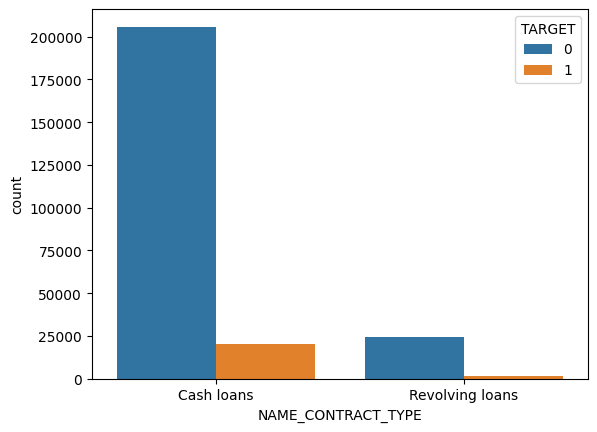

In [97]:
# plotting NAME_CONTRACT_TYPE

sns.countplot(data=df_app3,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [98]:
# Calculating percentages for defaulters and non-defaulters

default = df_app3[['NAME_CONTRACT_TYPE','TARGET']].groupby('NAME_CONTRACT_TYPE',as_index=False).mean()
default['DEFAULT_PCT'] = default['TARGET']*100
default

,NAME_CONTRACT_TYPE,TARGET,DEFAULT_PCT
0,Cash loans,0.090048,9.004792
1,Revolving loans,0.056510,5.650982


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='DEFAULT_PCT'>

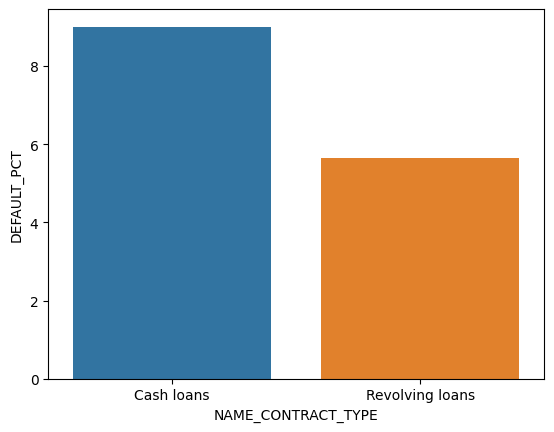

In [99]:
# Plotting NAME_CONTRACT_TYPE by default percentages

sns.barplot(data=default,x='NAME_CONTRACT_TYPE',y='DEFAULT_PCT')

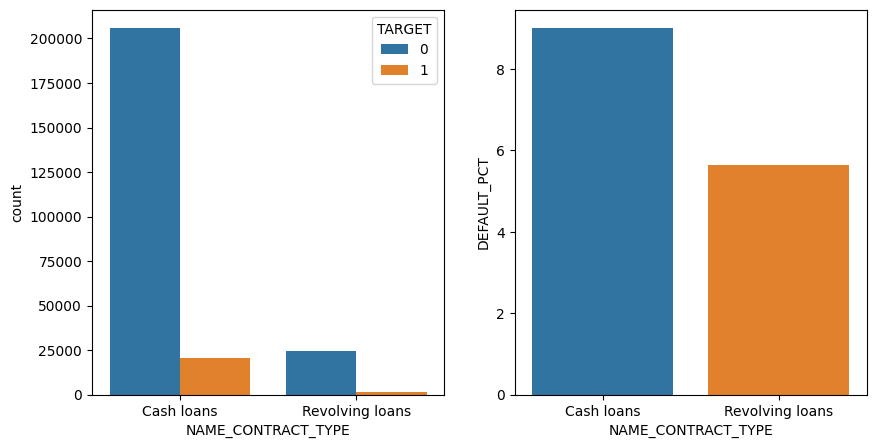

In [100]:
# Plotting NAME_CONTRACT_TYPE along with default percentages by category

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df_app3,x='NAME_CONTRACT_TYPE',hue='TARGET')
plt.subplot(1,2,2)
sns.barplot(data=default,x='NAME_CONTRACT_TYPE',y='DEFAULT_PCT')

plt.show()

- Most of the customers have taken Cash loans
- Customers who have taken cash loans are less likely to make defaults.

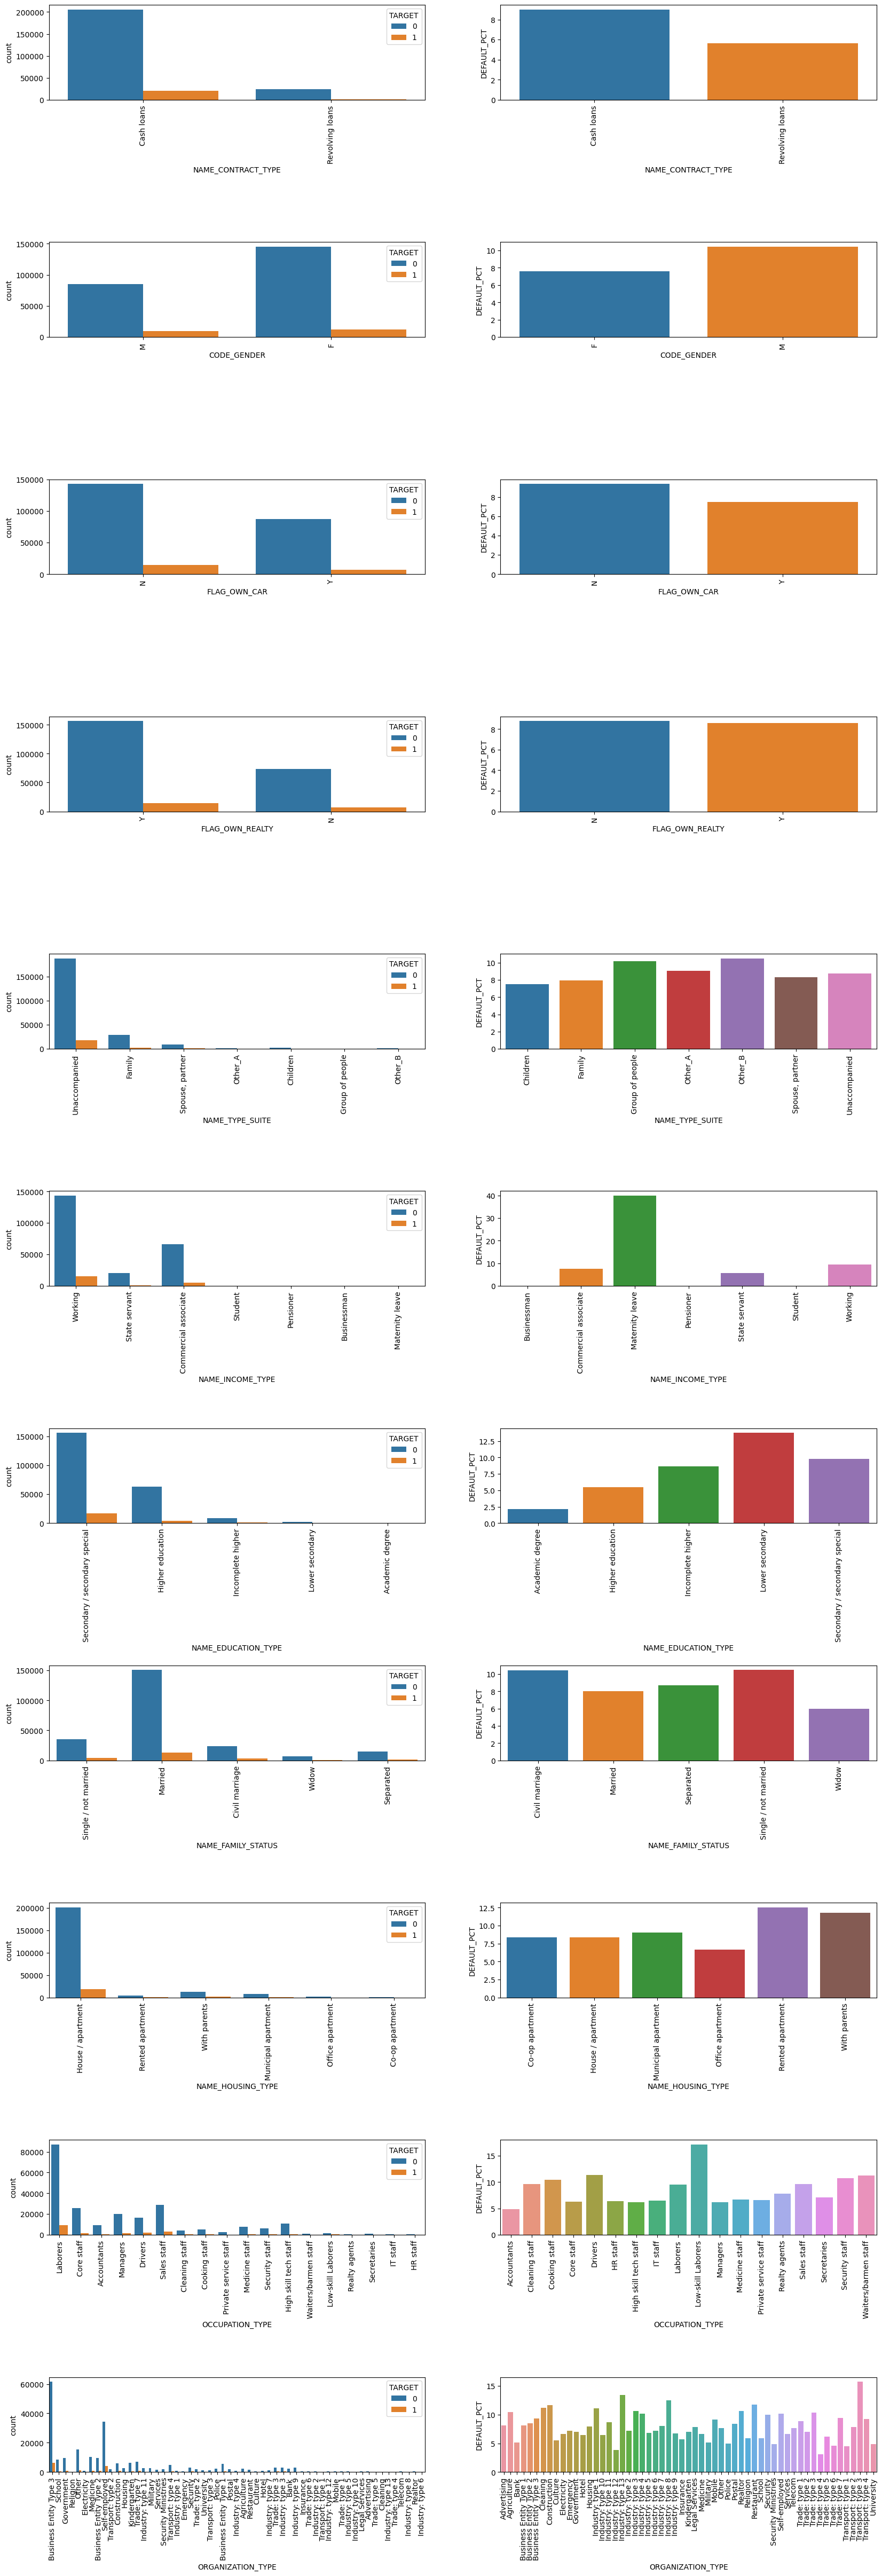

In [101]:
# Plotting Categorical features/columns along with default percentages by corresponding category

plt.figure(figsize=(20,60))

for i, feature in enumerate(categorical_features): 
    default = df_app3[[feature,'TARGET']].groupby(feature,as_index=False).mean()
    default['DEFAULT_PCT'] = default['TARGET']*100

    plt.subplot(11,2,i+i+1)
    plt.subplots_adjust(hspace=1.5)
    sns.countplot(data=df_app3,x=feature,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(11,2,i+i+2)
    sns.barplot(data=default,x=feature,y='DEFAULT_PCT')
    plt.xticks(rotation=90)

#### Insights

- Most of the females have taken loans.
- Default rate for females are just 7% making it lesser and safer than male.

- Highest amount of loans were given to customers who don't have car.
- Customers with car are safer as they have less default rate.

- Customers who own a house or a flat have been given highest amount of loans.
- Default rates for customers having own house or flat are less.

- Clients who were unaccompanied during the time of loan applications have taken most of the loans and the default rate is ~8.5% which is still safer.
- Clients accompanied with Other_B tend to make highest defaults.

- Working professionals, State Servants and Commercial associates are taking higest loans, also are the safest segment for the bank.

- Customers with Secondary education are taking maximum loans but the default rate is more than 8%
- Higher education is the safest segement of educational qualification to give loans as it has lesser default rate i.e., 5%

- Clients who are married are given maximum loans and also tend be be the safest.
- Customers who are single/never married tend to become highest defaulters.

- Clients having house/apartment the given the maximum loans and also tends to be the safest than others because default rate is lesser than 8%.
- Clients living with parents to be higher defaulters.

- Clients who are working as labourers are given maximum loans followed by Sales Staff.
- Low skilled labourers, drivers and waiters are highest defaulters.
- Accountants have the lowest default rate.
- Managers, Sales staff and core staff have comparatively lower default rates and are the safest segment.

- Customers working in organization type of Business Entity Type 3 were given highest loans followed by self-employed.
- Transport Type 3 are highest defaulter.
- Self employed, Business Entity Type 3 and Other have comparatively lesser defaulters.

### Exploring numerical columns

In [102]:
# printing all the numerical features/columns

numeric_features

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [103]:
# Check Data Imbalance

df_app3.TARGET.value_counts()

TARGET
0    230296
1     21835
Name: count, dtype: int64

- 0 represents people who are Non-Defaulter
- 1 represents people who are Defaulter

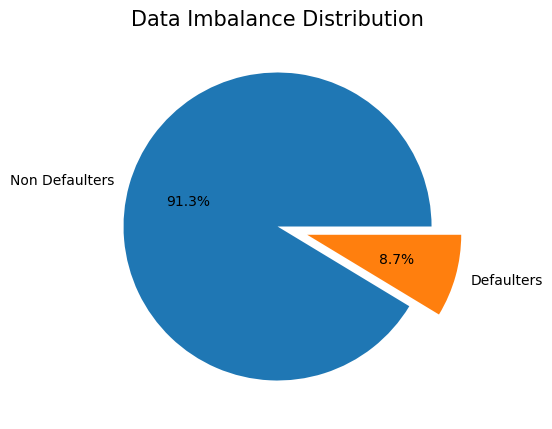

In [104]:
# Visualising the imbalanced data

plt.rcParams['figure.figsize'] = (10, 5)

size = df_app3['TARGET'].value_counts()
labels = 'Non Defaulters','Defaulters'
plt.pie(size,explode=[0,0.2], labels = labels,autopct = '%1.1f%%')
plt.title('Data Imbalance Distribution',fontweight = 10, fontsize = 15)
plt.axis('off')

plt.show()

In [105]:
# Printing the ratio of Imbalanced data

non_defaulters = df_app3.loc[df_app3['TARGET']==0]
defaulters = df_app3.loc[df_app3['TARGET']==1]
non_defaulters.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250k-300k,NaN,30k-40k,NaN,0-5Y,40-50Y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100k,100k-200k,0-10k,100k-200k,0-5Y,50-60Y
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-150k,300k-400k,20k-30k,200k-300k,5-10Y,50-60Y


In [106]:
defaulters.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200k-250k,400k-500k,20k-30k,300k-400k,0-5Y,20-30Y
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,1.0,3,2,9,0,0,0,0,0,0,Business Entity Type 3,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,100k-150k,900k and 1000k,20k-30k,700k-800k,5-10Y,50-60Y
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,200k-250k,NaN,30k-40k,800k-900k,0-5Y,40-50Y


### Correlations

In [107]:
# Finding the correlations among the variables of Defaulters (Target 1)

defaulters_corr = defaulters[numeric_features].drop(['SK_ID_CURR','TARGET'],axis=1).corr().abs()
defaulters_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001872,0.002074,0.015653,0.007707,0.032019,0.176563,0.032627,0.126411,0.089861,0.893829,0.046712,0.048951,0.038923,0.032465,0.039498,0.028031,0.019278,0.000876,0.016332,0.028804,0.003023,0.028046,0.003162,0.011577,0.001269,0.008695,0.006195,0.015163,0.011841,0.015698
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,0.007822,0.000039,0.003959,0.008858,0.003692,0.021128,0.022355,0.012520,0.006951,0.013245,0.012287,0.003664,0.006886,0.004401,0.005845,0.005837,0.005744,0.005272,0.001184,0.000925,0.000071,0.000885,0.005141,0.000607,0.005657
AMT_CREDIT,0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,0.189512,0.106003,0.033250,0.062405,0.045420,0.061324,0.074459,0.029054,0.020083,0.035695,0.035966,0.035325,0.041392,0.017875,0.016521,0.031438,0.017002,0.034792,0.115908,0.005051,0.000943,0.013307,0.061456,0.003275,0.008383
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,0.090497,0.049032,0.014302,0.044289,0.054884,0.075560,0.092358,0.022524,0.033311,0.063242,0.061609,0.013834,0.019728,0.006806,0.000881,0.024091,0.002111,0.027431,0.083159,0.010425,0.001406,0.034566,0.051267,0.002792,0.003192
AMT_GOODS_PRICE,0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,0.185486,0.111906,0.032067,0.064666,0.042147,0.069493,0.081219,0.042280,0.023532,0.039387,0.038453,0.035652,0.041491,0.017052,0.017289,0.026684,0.017832,0.029228,0.123232,0.004194,0.000755,0.015111,0.064831,0.002224,0.011406
REGION_POPULATION_RELATIVE,0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,0.049958,0.015758,0.055746,0.011965,0.030847,0.443159,0.447083,0.144049,0.021946,0.025422,0.050773,0.060398,0.053718,0.019017,0.004461,0.023838,0.004855,0.015310,0.054281,0.000885,0.001070,0.007411,0.067029,0.002863,0.004887
DAYS_BIRTH,0.176563,0.007822,0.189512,0.090497,0.185486,0.049958,1.000000,0.307018,0.241202,0.135519,0.110353,0.049387,0.048592,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,0.009033,0.011107,0.009615,0.012541,0.146773,0.010105,0.000314,0.001082,0.032843,0.019140,0.093098
DAYS_EMPLOYED,0.032627,0.000039,0.106003,0.049032,0.111906,0.015758,0.307018,1.000000,0.137454,0.096559,0.001630,0.006873,0.003773,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,0.031010,0.000387,0.030954,0.000188,0.169963,0.007059,0.007546,0.012194,0.028851,0.007965,0.044658
DAYS_REGISTRATION,0.126411,0.003959,0.033250,0.014302,0.032067,0.055746,0.241202,0.137454,1.000000,0.049891,0.123583,0.111576,0.106419,0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976,0.014905,0.014193,0.015236,0.012084,0.087973,0.003311,0.000184,0.006521,0.001332,0.009887,0.018053
DAYS_ID_PUBLISH,0.089861,0.008858,0.062405,0.044289,0.064666,0.011965,0.135519,0.096559,0.049891,1.000000,0.088621,0.004788,0.001434,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,0.014871,0.020501,0.012448,0.020283,0.009449,0.134239,0.000149,0.015244,0.003879,0.032077,0.004953,0.073064


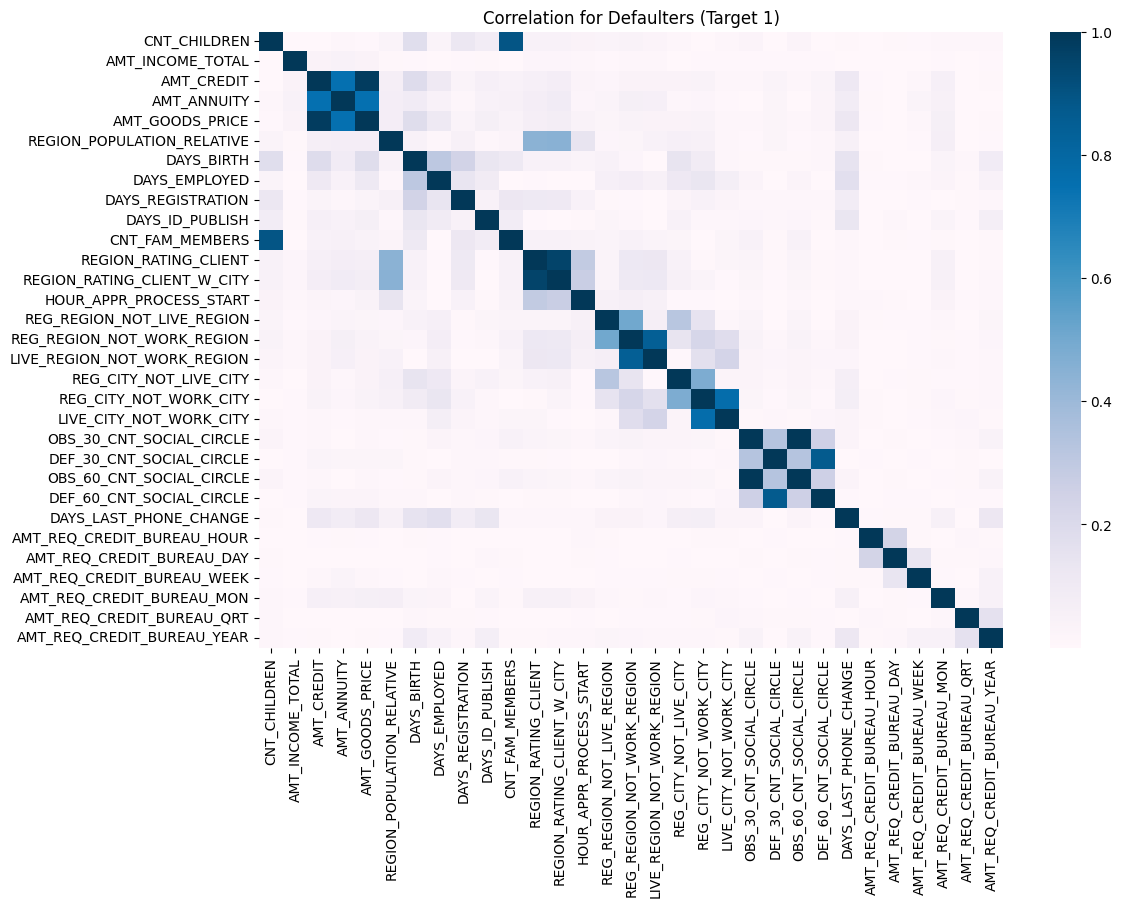

In [108]:
# Plotting correlations using heatmap for Defaulters

plt.figure(figsize=[12,8])
sns.heatmap(defaulters_corr,annot=False,cmap='PuBu')
plt.title('Correlation for Defaulters (Target 1)')
plt.show()

- Credit Amount, Annuity Amount and Amount of Goods Price have higher correlations with each other.

In [109]:
# Printing top 10 highly correlated variables of Defaulter customers

defaulter_corr_10 = defaulters_corr.abs().unstack().sort_values(ascending=False)
defaulter_corr_10 = defaulter_corr_10[defaulter_corr_10!=1.0]
defaulter_corr_10.head(15)

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998289
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998289
AMT_GOODS_PRICE              AMT_CREDIT                     0.982239
AMT_CREDIT                   AMT_GOODS_PRICE                0.982239
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956531
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956531
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867983
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867983
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.768247
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.768247
AMT_ANNUITY                  AMT_C

In [110]:
# Finding the correlations among the variables of Non-Defaulters (Target 0)

non_defaulters_corr = non_defaulters[numeric_features].drop(['SK_ID_CURR','TARGET'],axis=1).corr().abs()
non_defaulters_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.009814,0.018697,0.007608,0.022266,0.030355,0.242466,0.063033,0.162894,0.117742,0.893274,0.037482,0.037041,0.033040,0.023033,0.016787,0.006933,0.001566,0.010376,0.018421,0.019483,0.003502,0.019158,0.002464,0.002415,0.001019,0.000660,0.000047,0.017505,0.000449,0.020796
AMT_INCOME_TOTAL,0.009814,1.000000,0.326159,0.400755,0.333220,0.169312,0.045552,0.030105,0.034508,0.026452,0.003129,0.184263,0.198475,0.055927,0.064871,0.129732,0.121250,0.004261,0.020276,0.011256,0.031306,0.028219,0.031121,0.027672,0.034048,0.002665,0.009040,0.009070,0.054567,0.016234,0.038466
AMT_CREDIT,0.018697,0.326159,1.000000,0.762102,0.986318,0.103882,0.152661,0.087510,0.015178,0.034917,0.036768,0.106688,0.115338,0.040395,0.020978,0.050594,0.052025,0.037530,0.038524,0.014840,0.002928,0.021721,0.002898,0.023814,0.069833,0.002695,0.006213,0.000278,0.054185,0.022966,0.027906
AMT_ANNUITY,0.007608,0.400755,0.762102,1.000000,0.766464,0.122220,0.091573,0.052480,0.009814,0.025993,0.041236,0.132338,0.145520,0.034046,0.039757,0.076047,0.071627,0.018910,0.028977,0.014273,0.015593,0.022806,0.015412,0.023705,0.060867,0.003875,0.003147,0.013912,0.033067,0.014216,0.001532
AMT_GOODS_PRICE,0.022266,0.333220,0.986318,0.766464,1.000000,0.106990,0.146771,0.088610,0.011837,0.036684,0.034900,0.107586,0.115569,0.049968,0.023521,0.052041,0.052321,0.036937,0.039245,0.015806,0.003361,0.023118,0.003372,0.024791,0.071784,0.002259,0.006563,0.000790,0.055782,0.023344,0.030619
REGION_POPULATION_RELATIVE,0.030355,0.169312,0.103882,0.122220,0.106990,1.000000,0.041152,0.008658,0.059708,0.004022,0.028818,0.543388,0.540844,0.174747,0.003260,0.065835,0.092316,0.053683,0.049439,0.017022,0.014629,0.004506,0.014107,0.000185,0.043367,0.001446,0.001957,0.003768,0.074797,0.002379,0.003667
DAYS_BIRTH,0.242466,0.045552,0.152661,0.091573,0.146771,0.041152,1.000000,0.352649,0.298986,0.108047,0.178010,0.036901,0.036910,0.048602,0.058347,0.039291,0.014165,0.165511,0.112520,0.031121,0.019382,0.015084,0.018980,0.015758,0.136724,0.000236,0.001093,0.003591,0.033798,0.008807,0.069132
DAYS_EMPLOYED,0.063033,0.030105,0.087510,0.052480,0.088610,0.008658,0.352649,1.000000,0.172078,0.086672,0.031520,0.017369,0.015777,0.022186,0.056715,0.082429,0.063198,0.112020,0.125787,0.074659,0.000822,0.007395,0.000881,0.009341,0.135764,0.003172,0.000871,0.001396,0.029416,0.002096,0.024446
DAYS_REGISTRATION,0.162894,0.034508,0.015178,0.009814,0.011837,0.059708,0.298986,0.172078,1.000000,0.029890,0.155672,0.094116,0.086673,0.031519,0.020551,0.017584,0.009248,0.047239,0.055277,0.031350,0.016344,0.007937,0.016156,0.008160,0.072109,0.002818,0.000637,0.000588,0.020357,0.002216,0.018036
DAYS_ID_PUBLISH,0.117742,0.026452,0.034917,0.025993,0.036684,0.004022,0.108047,0.086672,0.029890,1.000000,0.109784,0.003621,0.001314,0.005439,0.026744,0.020988,0.008962,0.053424,0.033080,0.001777,0.008887,0.008564,0.009397,0.010155,0.104177,0.001470,0.003028,0.009029,0.030795,0.014192,0.056119


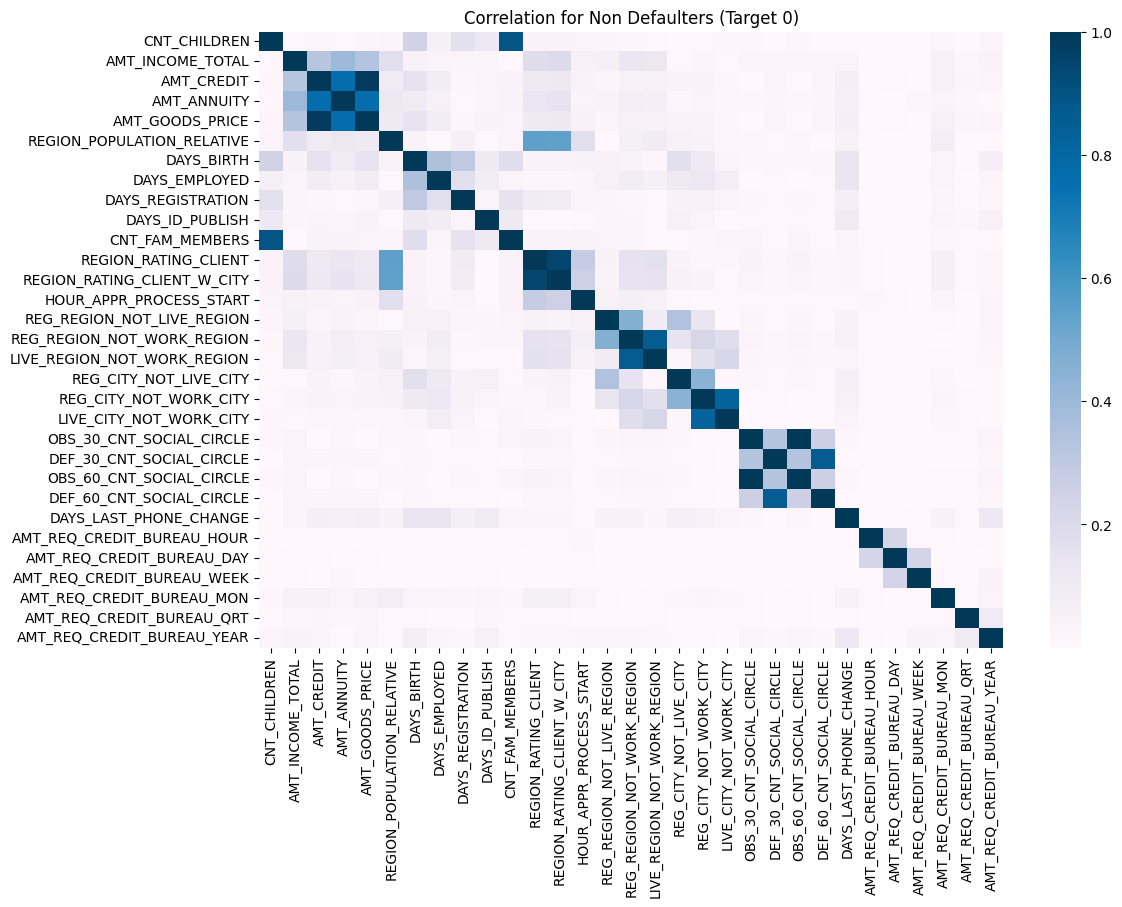

In [111]:
# Plotting correlations using heatmap for Non-Defaulters

plt.figure(figsize=[12,8])
sns.heatmap(non_defaulters_corr,annot=False,cmap='PuBu')
plt.title('Correlation for Non Defaulters (Target 0)')
plt.show()

- Total Income Amount, Credit Amount, Annuity Amount and Amount of Goods Price have higher correlations with each other.
- Income of Customers tend to be slightly higher in densly populated region.

In [112]:
# Printing top 10 highly correlated variables of Non Defaulter people

non_defaulter_corr_10 = non_defaulters_corr.abs().unstack().sort_values(ascending=False)
non_defaulter_corr_10 = non_defaulter_corr_10[non_defaulter_corr_10!=1.0]
non_defaulter_corr_10.head(15)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998492
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998492
AMT_CREDIT                   AMT_GOODS_PRICE                0.986318
AMT_GOODS_PRICE              AMT_CREDIT                     0.986318
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949503
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949503
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893274
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893274
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861439
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861439
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860411
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860411
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.820825
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.820825
AMT_ANNUITY                  AMT_G

In [113]:
# numerical dataframe

df_app3[numeric_features].head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
# Creating a list 

amt_feat = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

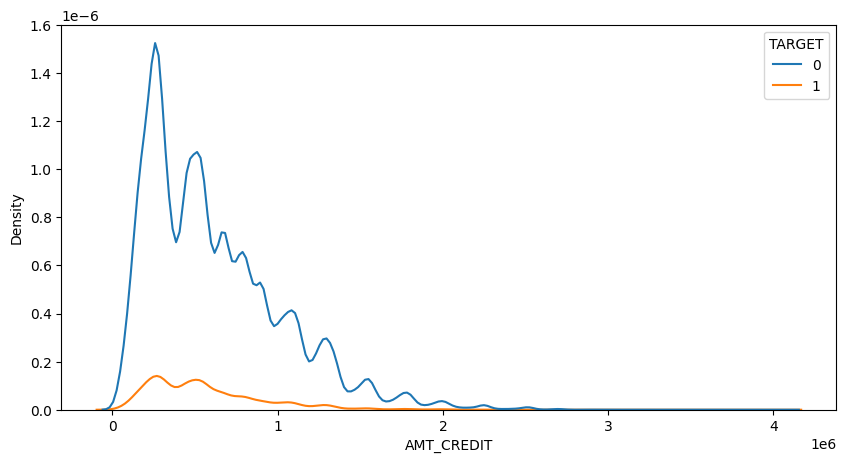

In [115]:
# Plotting kdeplot for AMT_CREDIT

sns.kdeplot(data=df_app3[numeric_features],x='AMT_CREDIT',hue='TARGET')

- Customers who are credited amount between 0 to 1.5 millions made then most defaults

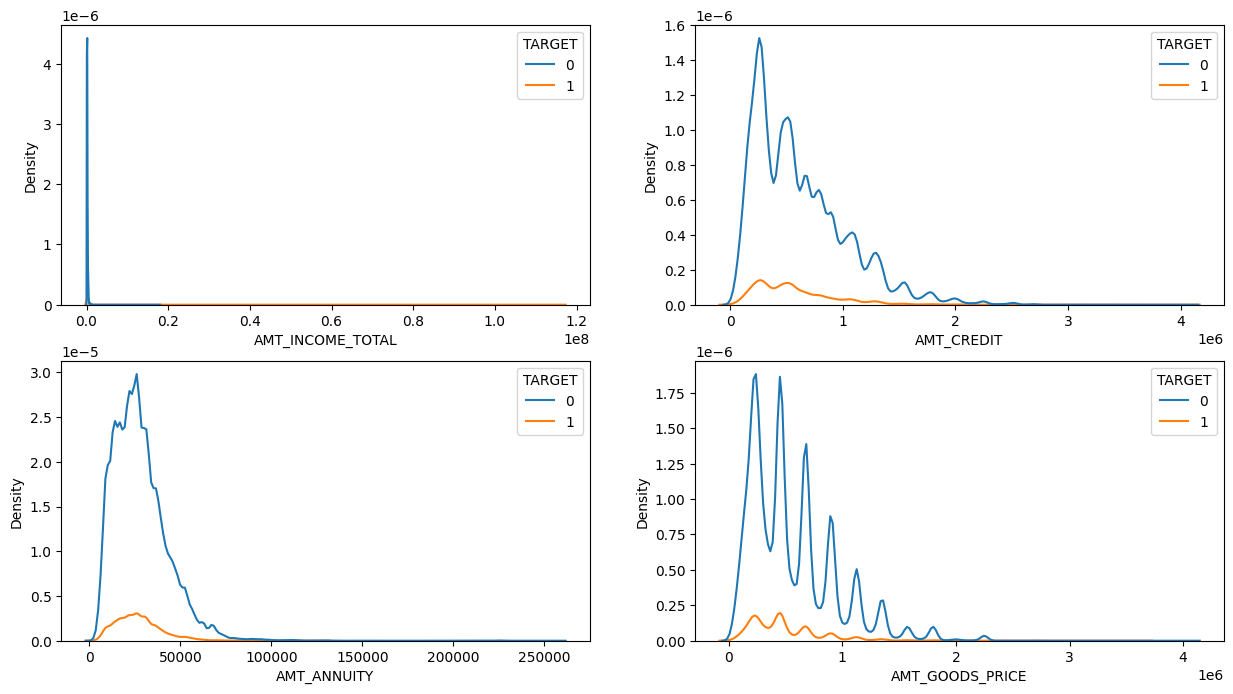

In [116]:
# Plotting kdeplot for the list we created above

plt.figure(figsize=(15,8))

for i, amt_col in enumerate(amt_feat):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df_app3[numeric_features],x=amt_col,hue='TARGET')
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    

#### Insights

- The Goods Price for which the loan was applied were mostly below 1 million.
- The amount credited to the customers were mostly near to the goods price i.e., upto 1 million.
- The annuity amount repayed by customers was mostly seen below 50,000.
- The total income of customers were mostly below 5 million which is having lower incomes.

### BIVARIATE ANALYSIS

### AMT_CREDIT vs AMT_GOODS_PRICE

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

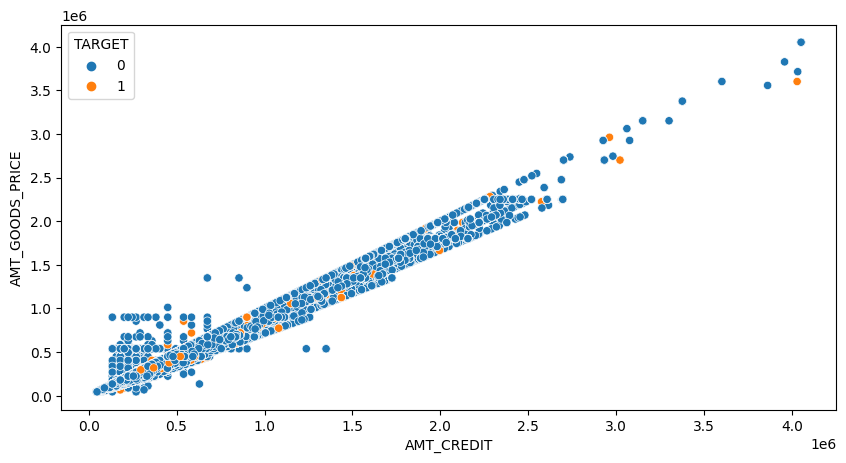

In [117]:
# Plotting AMT_CREDIT vs AMT_GOODS_PRICE

sns.scatterplot(data=df_app3[numeric_features],x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

- Goods Price Amount and Credited Amount are linearly correlated to each other.
- Customers with credit amount less than 1.5 million are more likely to make defaults.

### Plotting AMT_CREDIT vs AMT_INCOME_TOTAL

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

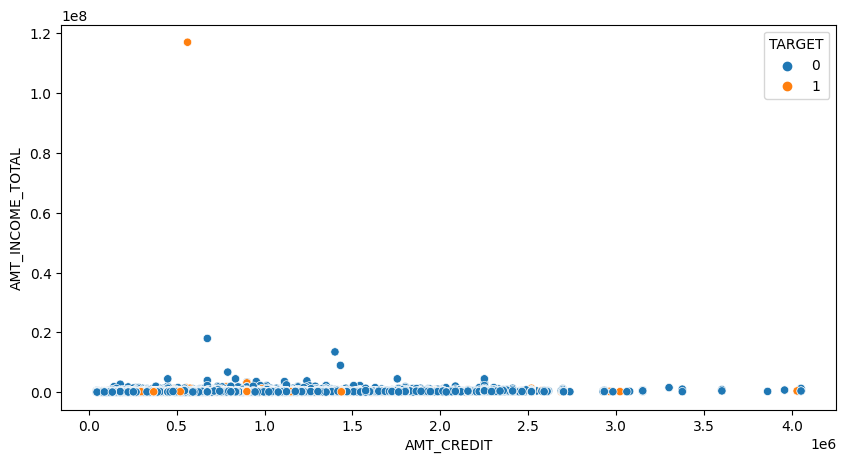

In [118]:
# Plotting AMT_CREDIT vs AMT_INCOME_TOTAL

sns.scatterplot(data=df_app3[numeric_features],x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

- Customers with income less than 5 millions are mostly taking the loans.
- Customers who are granted credits below 1.5 million are most likely to make defaults.
- The bank should focus on customers who are getting credit amount more than 1.5 million as they tend to make less defaults.

### AMT_CREDIT vs AMT_ANNUITY

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>

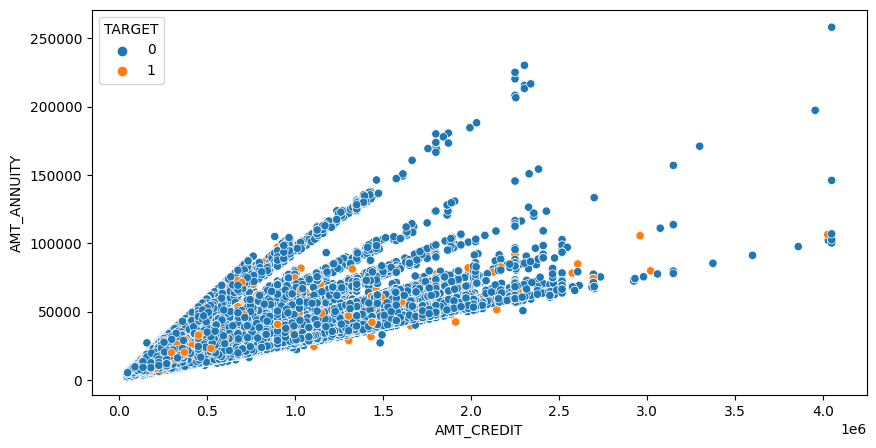

In [119]:
# Plotting AMT_CREDIT vs AMT_ANNUITY

sns.scatterplot(data=df_app3[numeric_features],x='AMT_CREDIT',y='AMT_ANNUITY',hue='TARGET')

- Customers capable of paying annuity amount of 100k have higher chances of getting loans upto 2 millions.
- Increase in Annuity amount will result in higher amount of loans.

### AMT_CREDIT vs CNT_CHILDREN

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

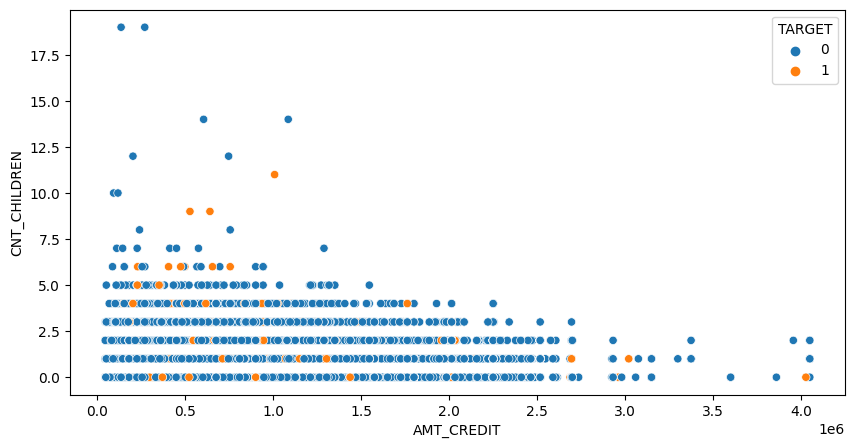

In [120]:
# Plotting AMT_CREDIT vs CNT_CHILDREN

sns.scatterplot(data=df_app3[numeric_features],x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

- Customers with number of children 1 to 4 are safer for the bank.
- Customers with no children and credit amount more than 1.5 million are also safer and less likely to make defaults.

### AMT_CREDIT vs DAYS_BIRTH_RANGE

<Axes: xlabel='AMT_CREDIT', ylabel='DAYS_BIRTH_RANGE'>

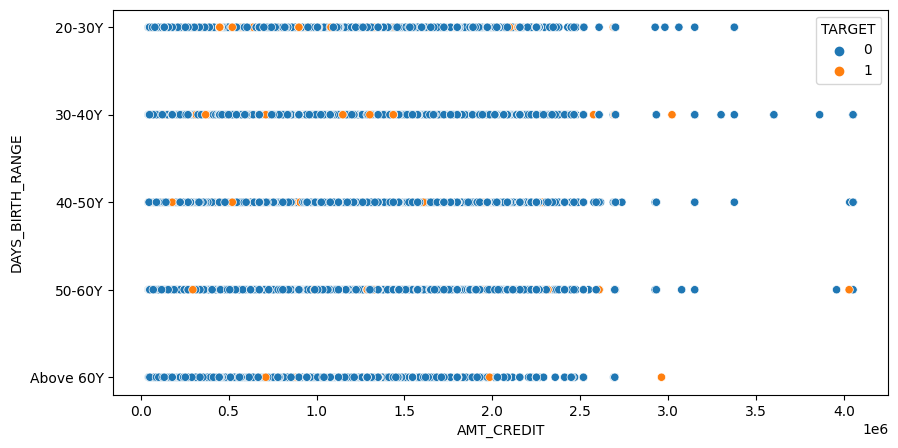

In [121]:
# Plotting AMT_CREDIT vs DAYS_BIRTH_RANGE

sns.scatterplot(data=df_app3[numeric_cat_features],x='AMT_CREDIT',y='DAYS_BIRTH_RANGE',hue='TARGET')

- Customers within the age of 30-40 years have made the most defaults followed the 20-30 years.
- Aged above 40 customers are less likely to make defaults and are safer.

### AMT_CREDIT vs DAYS_EMPLOYED_RANGE

<Axes: xlabel='AMT_CREDIT', ylabel='DAYS_EMPLOYED_RANGE'>

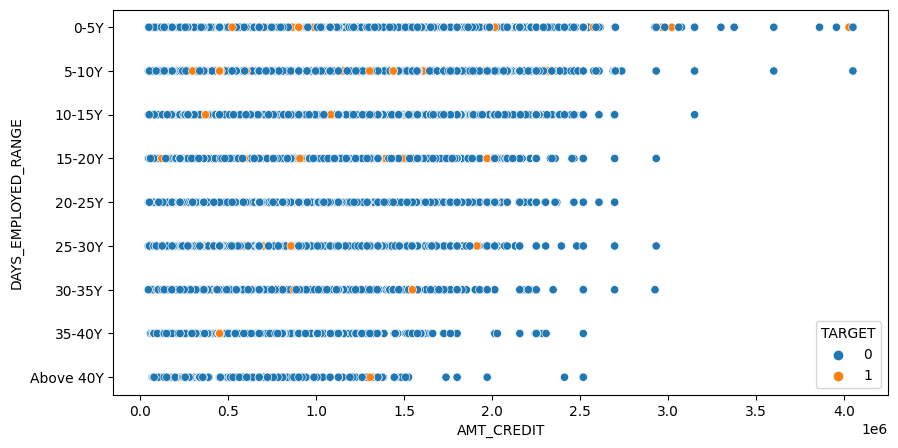

In [122]:
# Plotting AMT_CREDIT vs DAYS_EMPLOYED_RANGE

sns.scatterplot(data=df_app3[numeric_cat_features],x='AMT_CREDIT',y='DAYS_EMPLOYED_RANGE',hue='TARGET')

- Customers with working experience between 0 to 10 years are seen doing the most defaults.
- Bank should focus on customers who are employed for more than 20 years.

### Defining Outliers

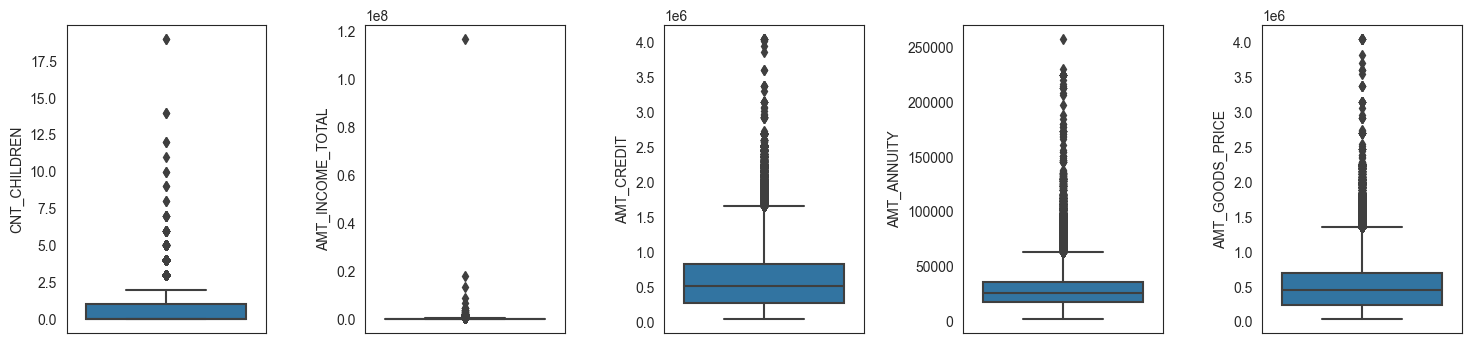

In [123]:
# Plotting Outliers

plt.figure(figsize=[18,4])
sns.set_style('white')

outlier_check_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

for i, col in enumerate(outlier_check_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(data=df_app3,y=col)
    plt.subplots_adjust(wspace=0.5)

## Data Cleaning for previous_application

In [124]:
# Head of previous_application dataframe

df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# Shape of previous_application dataframe

df_prev.shape

(1670214, 37)

In [126]:
# Columns name present in previous_application dataframe

df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## Data Cleaning for previous_application Dataframe

In [127]:
# Calculating sum of null values in all the columns in percentage

null_df_prev = df_prev.isna().sum()/len(df_prev) *100
print(null_df_prev.sort_values(ascending=False))

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

### Droppring all the columns where null values are more than 40%

In [128]:
# Finding columns with null data more than 40%

drop_pct = 40
dropped_columns_lt_40pct = null_df_prev[null_df_prev > drop_pct].index
len(dropped_columns_lt_40pct)

11

In [129]:
# Dropping columns with more than 40% null data

df_prev2 = df_prev.drop(dropped_columns_lt_40pct,axis=1)
df_prev2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [130]:
# Column names of dataframe after dropping columns with more than 40% null data

df_prev2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Dropping columns from the dataframe which are not important for analytics

In [131]:
# Selecting columns that are less important for solving the problem statement and dropping them

dropped_columns = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 
                   'NFLAG_LAST_APPL_IN_DAY']

df_prev3 = df_prev2.drop(dropped_columns,axis=1)
df_prev3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [132]:
# Shape of final previous_application dataframe

df_prev3.shape

(1670214, 22)

### Checking sum of null values present in all the columns

In [133]:
# Checking the sum of null data present in all the columns of dataframe and sorting them

df_prev3.isna().sum().sort_values(ascending=True)

SK_ID_PREV                     0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
NAME_YIELD_GROUP               0
NAME_PAYMENT_TYPE              0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
SK_ID_CURR                     0
DAYS_DECISION                  0
AMT_CREDIT                     1
PRODUCT_COMBINATION          346
CNT_PAYMENT               372230
AMT_ANNUITY               372235
AMT_GOODS_PRICE           385515
dtype: int64

In [134]:
# Head of 'PRODUCT_COMBINATION' column

df_prev3['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [135]:
# Grouping the 'PRODUCT_COMBINATION' column by category size and sorting them

df_prev3.groupby(df_prev3['PRODUCT_COMBINATION']).size().sort_values(ascending=False)

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
dtype: int64

In [136]:
# Imputing null values with 'Cash' in 'PRODUCT_COMBINATION' column

df_prev3['PRODUCT_COMBINATION'].fillna('Cash',inplace=True)

In [137]:
# Checking presence of any null values in 'PRODUCT_COMBINATION' column

df_prev3['PRODUCT_COMBINATION'].isna().any()

False

In [138]:
# Head of 'CNT_PAYMENT' column

df_prev3['CNT_PAYMENT'].head()

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
Name: CNT_PAYMENT, dtype: float64

In [139]:
# Grouping the 'CNT_PAYMENT' column by category size and sorting them

df_prev3.groupby(df_prev3['CNT_PAYMENT']).size().sort_values(ascending=False)

CNT_PAYMENT
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
19.0         6
32.0         6
59.0         4
34.0         4
41.0         3
47.0         3
21.0         3
45.0         3
44.0         2
46.0         2
39.0         2
38.0         2
33.0         1
40.0         1
53.0         1
dtype: int64

In [140]:
# Imputing null values with mode in 'CNT_PAYMENT' column

df_prev3['CNT_PAYMENT'].fillna(12.0,inplace=True)

In [141]:
# Checking presence of any null values in 'CNT_PAYMENT' column

df_prev3['CNT_PAYMENT'].isna().any()

False

In [142]:
# Finding mean of ''AMT_ANNUITY', 'AMT_GOODS_PRICE'' columns

df_prev3[['AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE
count,1.297979e+06,1.284699e+06
mean,1.595512e+04,2.278473e+05
std,1.478214e+04,3.153966e+05
min,0.000000e+00,0.000000e+00
25%,6.321780e+03,5.084100e+04
50%,1.125000e+04,1.123200e+05
75%,2.065842e+04,2.340000e+05
max,4.180581e+05,6.905160e+06


In [143]:
# Imputing null values with mean in ''AMT_ANNUITY', 'AMT_GOODS_PRICE'' column

df_prev3['AMT_ANNUITY'].fillna(15955.1,inplace=True)
df_prev3['AMT_GOODS_PRICE'].fillna(227847.2,inplace=True)

In [144]:
# Checking presence of any null values in ''AMT_ANNUITY', 'AMT_GOODS_PRICE'' column

df_prev3['CNT_PAYMENT'].isna().any()

False

In [145]:
df_prev3.isna().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                1
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

In [146]:
# Head of final previous_application dataframe

df_prev3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### Checking Duplicate data in the dataframe

In [147]:
# Duplicate Data

df_prev3.duplicated().sum()

0

### Information of the dataframe

In [148]:
# Info of the dataframe

df_prev3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1670214 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

### Checking Unique data values in the dataframe

In [149]:
# Checking number of unique values in each column 

df_prev3.nunique().sort_values(ascending=False)

SK_ID_PREV                1670214
AMT_ANNUITY                357960
SK_ID_CURR                 338857
AMT_GOODS_PRICE             93886
AMT_APPLICATION             93885
AMT_CREDIT                  86803
DAYS_DECISION                2922
SELLERPLACE_AREA             2097
CNT_PAYMENT                    49
NAME_GOODS_CATEGORY            28
NAME_CASH_LOAN_PURPOSE         25
PRODUCT_COMBINATION            17
NAME_SELLER_INDUSTRY           11
CODE_REJECT_REASON              9
CHANNEL_TYPE                    8
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
NAME_CLIENT_TYPE                4
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_STATUS            4
NAME_CONTRACT_TYPE              4
NAME_PRODUCT_TYPE               3
dtype: int64

## Defining numerical and categorical columns in previous_application

In [150]:
# define numerical & categorical columns in previous_application

numeric_features = [feature for feature in df_prev3.columns if df_prev3[feature].dtype != 'O']
categorical_features = [feature for feature in df_prev3.columns if df_prev3[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']

We have 13 categorical features : ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


### Printing all the unique data present in the categorical columns in previous_application

In [151]:
# Printing all the unique data present in the categorical columns 

for feature in categorical_features:
    print(f"Categories in '{feature}' variable: ",end=" " )
    print(df_prev3[feature].unique())

Categories in 'NAME_CONTRACT_TYPE' variable:  ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
Categories in 'NAME_CASH_LOAN_PURPOSE' variable:  ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
Categories in 'NAME_CONTRACT_STATUS' variable:  ['Approved' 'Refused' 'Canceled' 'Unused offer']
Categories in 'NAME_PAYMENT_TYPE' variable:  ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
Categories in 'CODE_REJECT_REASON' variable:  ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
Categories in 'N

### Plotting pie-chart for 'NAME_CONTRACT_STATUS' column in previous_application

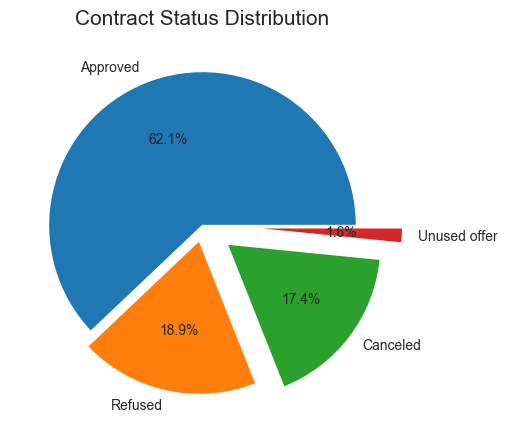

In [152]:
# Plotting pie-chart for 'NAME_CONTRACT_STATUS' column

plt.rcParams['figure.figsize'] = (10, 5)

size = df_prev3['NAME_CONTRACT_STATUS'].value_counts()
labels = 'Approved', 'Refused', 'Canceled', 'Unused offer'
plt.pie(size,explode=[0,0.1,0.2,0.3], labels = labels,autopct = '%1.1f%%')
plt.title('Contract Status Distribution',fontweight = 10, fontsize = 15)
plt.axis('off')

plt.show()

- We can clearly see that the Approved loan applications are 62.1%.
- Refused applications are 18.9% and Cancelled applications are 17.4%

### Plotting pie-chart for 'NAME_CONTRACT_TYPE' column in previous_application

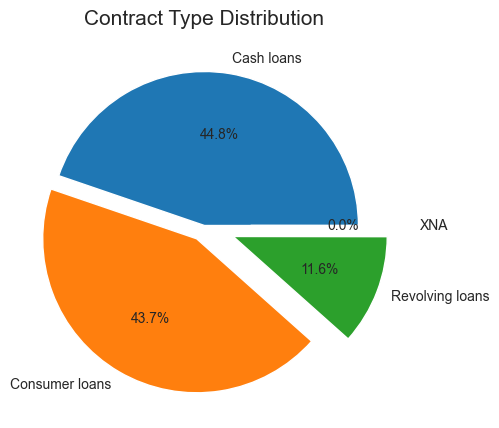

In [153]:
# Plotting pie-chart for 'NAME_CONTRACT_TYPE' column

plt.rcParams['figure.figsize'] = (10, 5)

size = df_prev3['NAME_CONTRACT_TYPE'].value_counts()
labels = 'Cash loans','Consumer loans','Revolving loans','XNA'
plt.pie(size,explode=[0,0.1,0.2,0.3], labels = labels,autopct = '%1.1f%%')
plt.title('Contract Type Distribution',fontweight = 10, fontsize = 15)
plt.axis('off')

plt.show()

- Cash loan is the most popular type of loan clients are applying for i.e., 44.8% followed by Consumer loan which is 43.7%
- Revolving loans contributes 11.6% in the previous applications

### Plotting pie-chart for 'NAME_CLIENT_TYPE' column in previous_application

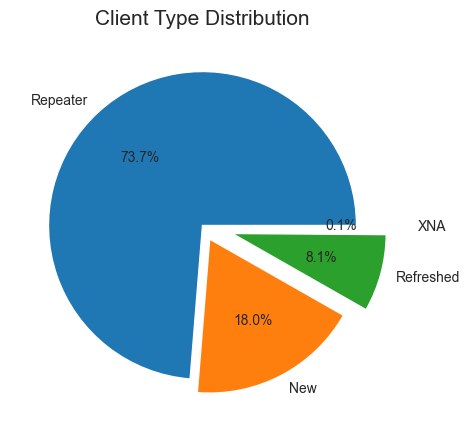

In [154]:
# Plotting pie-chart for 'NAME_CLIENT_TYPE' column

plt.rcParams['figure.figsize'] = (10, 5)

size = df_prev3['NAME_CLIENT_TYPE'].value_counts()
labels = 'Repeater','New','Refreshed','XNA'
plt.pie(size,explode=[0,0.1,0.2,0.3], labels = labels,autopct = '%1.1f%%')
plt.title('Client Type Distribution',fontweight = 10, fontsize = 15)
plt.axis('off')

plt.show()

- We can clearly see that the Reapeted clients in previous loan applications are more than 73.7%.
- New clientc contributes 18.0% whilst Refreshed client contributes only 8.1%.

## Merging application_data and previous_application dataframes

In [155]:
# Merging both dataframes i.e., application_data and previous_application

df_merge = pd.merge(left=df_app3,right=df_prev3,how='inner',on='SK_ID_CURR')
df_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200k-250k,400k-500k,20k-30k,300k-400k,0-5Y,20-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250k-300k,NaN,30k-40k,NaN,0-5Y,40-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250k-300k,NaN,30k-40k,NaN,0-5Y,40-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250k-300k,NaN,30k-40k,NaN,0-5Y,40-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100k,100k-200k,0-10k,100k-200k,0-5Y,50-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


### Shape of df_merge Dataframe

In [156]:
# Shape of df_merge dataframe

df_merge.shape

(1140063, 71)

### Column names of df_merge dataframe

In [157]:
# Printing all the column names present in df_merge dataframe

df_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU

## Defining numerical and categorical columns in df_merge dataframe

In [158]:
# define numerical & categorical columns

numeric_features = [feature for feature in df_merge.columns if df_merge[feature].dtype != 'O']
categorical_features = [feature for feature in df_merge.columns if df_merge[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 47 numerical features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE', 'DAYS_EMPLOYED_RANGE', 'DAYS_BIRTH_RANGE', 'SK_ID_PREV', 'AMT_ANNUITY_y', 'AMT_A

### NAME_CASH_LOAN_PURPOSE by NAME_CONTRACT_STATUS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'XAP'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Payments on other loans'),
  Text(4, 0, 'Buying a used car'),
  Text(5, 0, 'Repairs'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Buying a new car'),
  Text(8, 0, 'Everyday expenses'),
  Text(9, 0, 'Urgent needs'),
  Text(10, 0, 'Buying a holiday home / land'),
  Text(11, 0, 'Medicine'),
  Text(12, 0, 'Car repairs'),
  Text(13, 0, 'Building a house or an annex'),
  Text(14, 0, 'Furniture'),
  Text(15, 0, 'Purchase of electronic equipment'),
  Text(16, 0, 'Wedding / gift / holiday'),
  Text(17, 0, 'Buying a home'),
  Text(18, 0, 'Journey'),
  Text(19, 0, 'Business development'),
  Text(20, 0, 'Gasification / water supply'),
  Text(21, 0, 'Buying a garage'),
  Text(22, 0, 'Hobby'),
  Text(23, 0, 'Money for a third person'),
  Text(24, 0, 'Refusal to name the goal')])

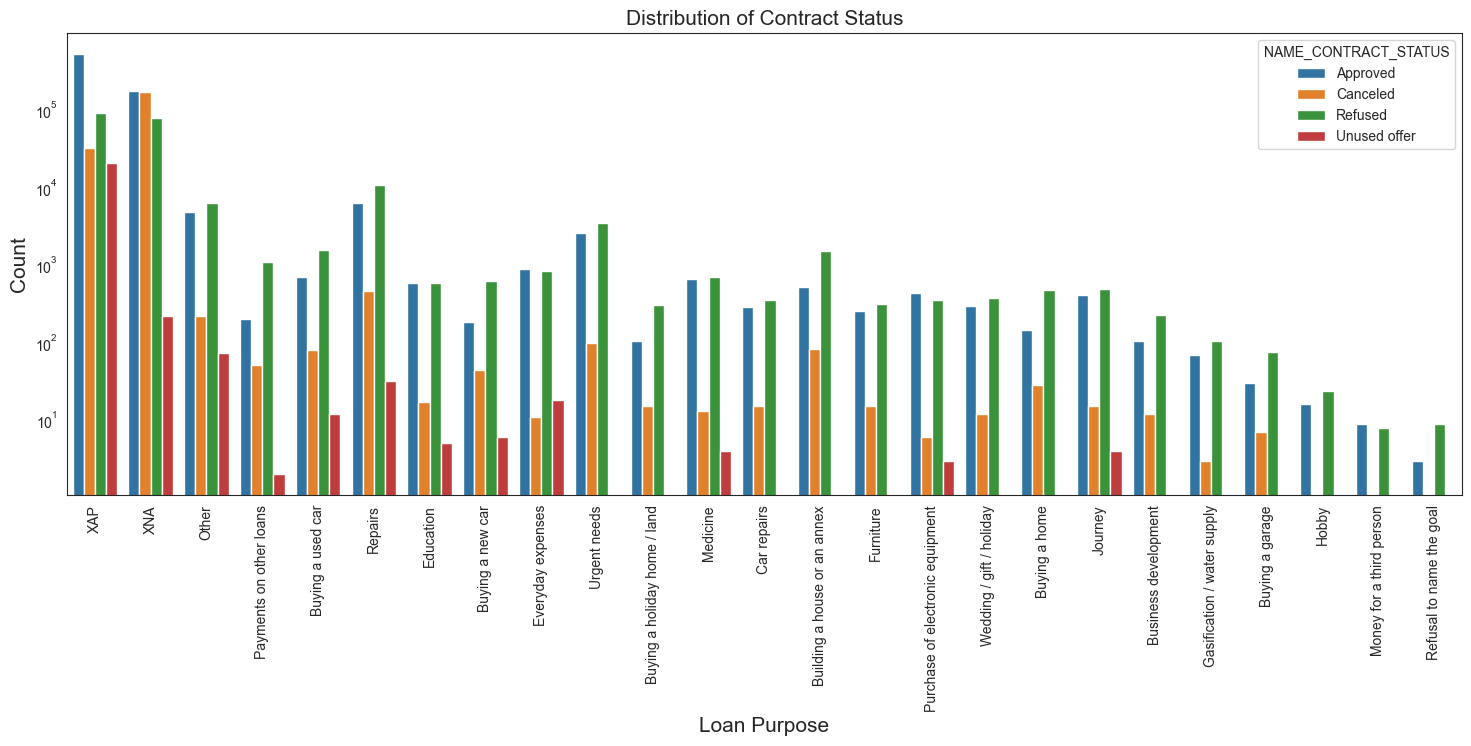

In [159]:
# Plottings of NAME_CASH_LOAN_PURPOSE by NAME_CONTRACT_STATUS

plt.figure(figsize=(18,6))

sns.countplot(data=df_merge, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.title('Distribution of Contract Status',fontsize=15)
plt.yscale('log')
plt.xlabel('Loan Purpose',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)

- The highest number of loan applications were for Repair purpose followed by Other.
- Number of loan cancellations  for the Repair purpose was maximum.

### NAME_CONTRACT_STATUS by TARGET

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Approved'),
  Text(1, 0, 'Canceled'),
  Text(2, 0, 'Refused'),
  Text(3, 0, 'Unused offer')])

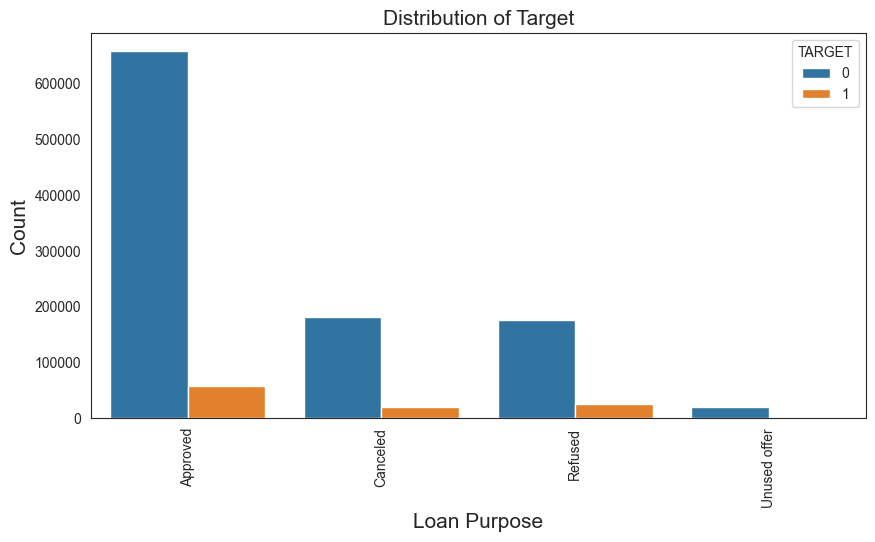

In [160]:
# Plottings of NAME_CONTRACT_STATUS by TARGET

plt.figure(figsize=(10,5))

sns.countplot(data=df_merge, x='NAME_CONTRACT_STATUS',hue='TARGET')
plt.title('Distribution of Target',fontsize=15)
plt.xlabel('Loan Purpose',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)

- It's clearly seen that most of the loan application which were cancelled or refused previously, 80-90% of them turned out to be non-defaulters in the current application.
- Therefore, bank can re-analyse the previous cancelled and refused applications and offer the loan to the customers.

### AMT_INCOME_RANGE by NAME_CONTRACT_STATUS

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-100k'),
  Text(1, 0, '100k-150k'),
  Text(2, 0, '150k-200k'),
  Text(3, 0, '200k-250k'),
  Text(4, 0, '250k-300k'),
  Text(5, 0, '300k-350k'),
  Text(6, 0, '350k-400k'),
  Text(7, 0, '400k-450k'),
  Text(8, 0, '450k-500k'),
  Text(9, 0, '500k and above')])

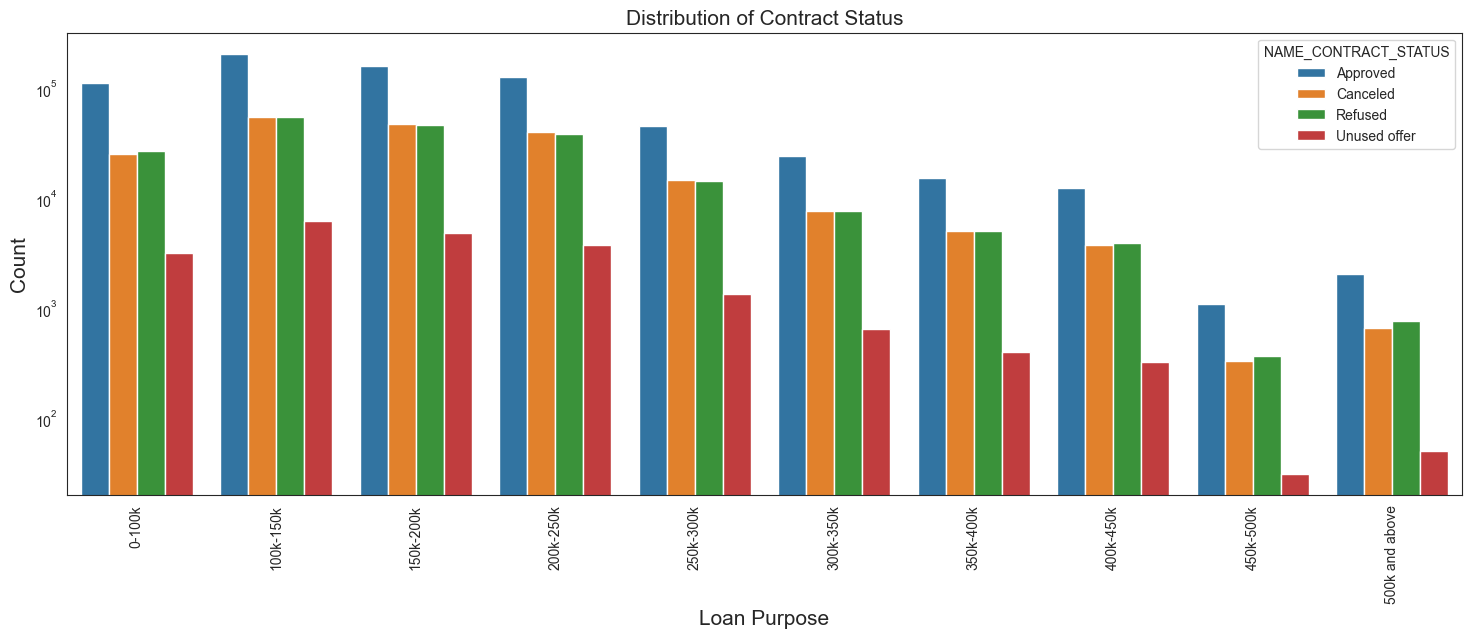

In [161]:
# Plottings of AMT_INCOME_RANGE by NAME_CONTRACT_STATUS

plt.figure(figsize=(18,6))

sns.countplot(data=df_merge, x='AMT_INCOME_RANGE',hue='NAME_CONTRACT_STATUS')
plt.title('Distribution of Contract Status',fontsize=15)
plt.yscale('log')
plt.xlabel('Loan Purpose',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)

- Customers earning between 100k to 150k had highest number of cancellations and rejections in the previous applications

### AMT_INCOME_RANGE by TARGET

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-100k'),
  Text(1, 0, '100k-150k'),
  Text(2, 0, '150k-200k'),
  Text(3, 0, '200k-250k'),
  Text(4, 0, '250k-300k'),
  Text(5, 0, '300k-350k'),
  Text(6, 0, '350k-400k'),
  Text(7, 0, '400k-450k'),
  Text(8, 0, '450k-500k'),
  Text(9, 0, '500k and above')])

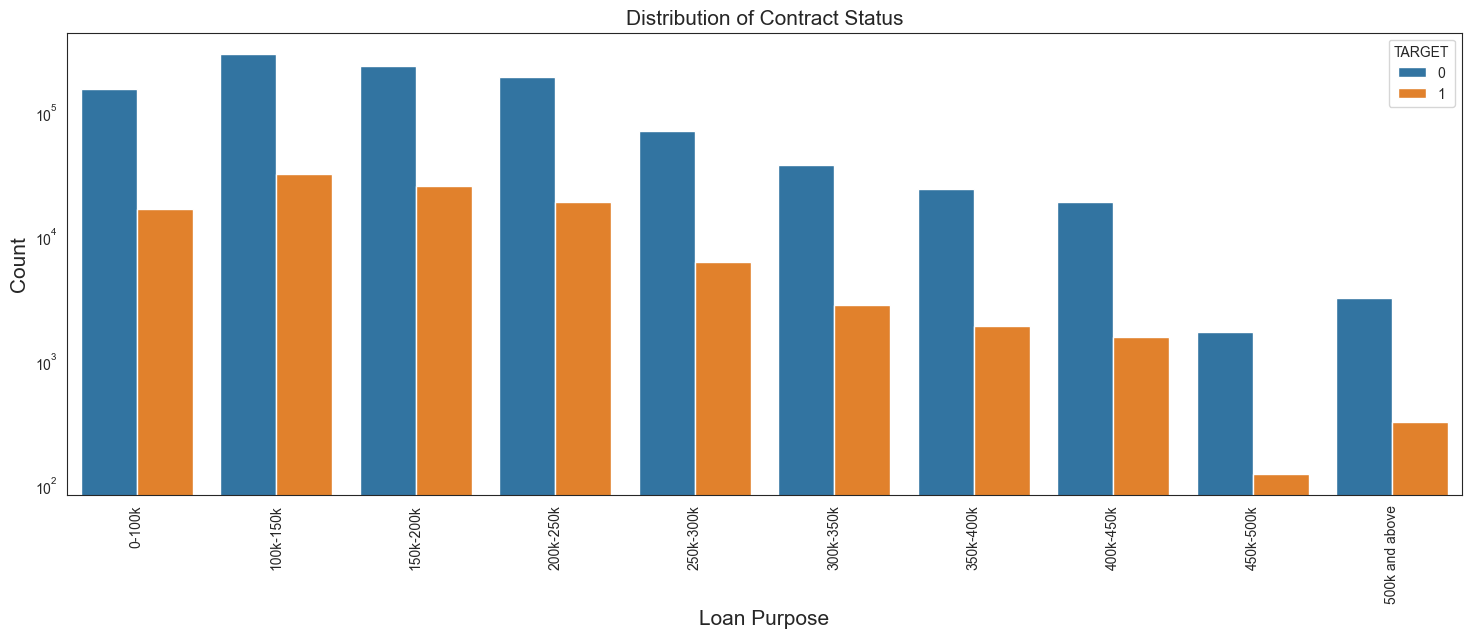

In [162]:
# Plottings of AMT_INCOME_RANGE by TARGET
plt.figure(figsize=(18,6))

sns.countplot(data=df_merge, x='AMT_INCOME_RANGE',hue='TARGET')
plt.title('Distribution of Contract Status',fontsize=15)
plt.yscale('log')
plt.xlabel('Loan Purpose',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)

- Though customers earning between 100k to 150k had higher cancellation and rejections in previous applications. In the current application they are less likely to make defaults.

In [163]:
### NAME_CASH_LOAN_PURPOSE by TARGET

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'XAP'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Payments on other loans'),
  Text(4, 0, 'Buying a used car'),
  Text(5, 0, 'Repairs'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Buying a new car'),
  Text(8, 0, 'Everyday expenses'),
  Text(9, 0, 'Urgent needs'),
  Text(10, 0, 'Buying a holiday home / land'),
  Text(11, 0, 'Medicine'),
  Text(12, 0, 'Car repairs'),
  Text(13, 0, 'Building a house or an annex'),
  Text(14, 0, 'Furniture'),
  Text(15, 0, 'Purchase of electronic equipment'),
  Text(16, 0, 'Wedding / gift / holiday'),
  Text(17, 0, 'Buying a home'),
  Text(18, 0, 'Journey'),
  Text(19, 0, 'Business development'),
  Text(20, 0, 'Gasification / water supply'),
  Text(21, 0, 'Buying a garage'),
  Text(22, 0, 'Hobby'),
  Text(23, 0, 'Money for a third person'),
  Text(24, 0, 'Refusal to name the goal')])

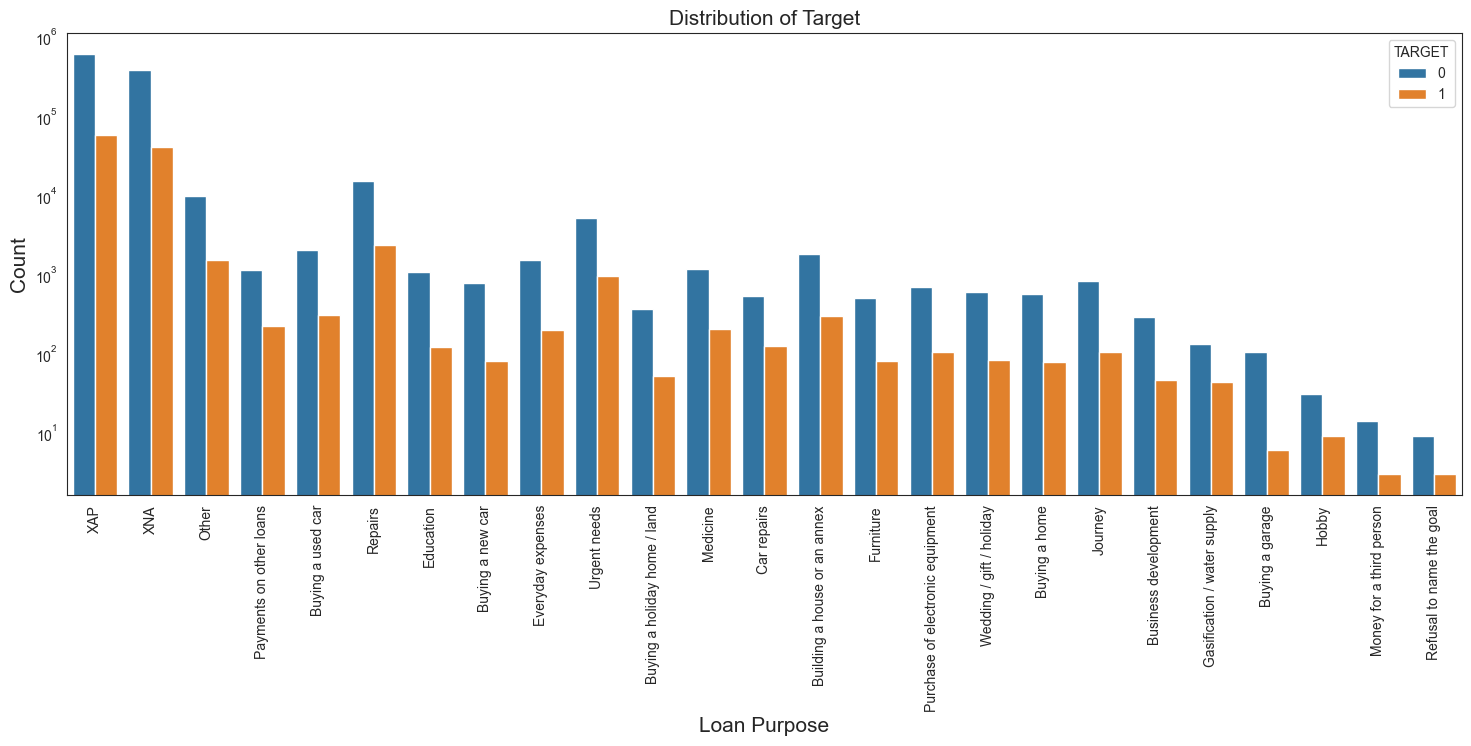

In [164]:
# Plottings of NAME_CASH_LOAN_PURPOSE by TARGET

plt.figure(figsize=(18,6))

sns.countplot(data=df_merge, x='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.title('Distribution of Target',fontsize=15)
plt.yscale('log')
plt.xlabel('Loan Purpose',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)

- Customers applying previously for Repair and Other pyrposes had highest number of cancellation and refusal in thei applications. However, in the current scenario, customers having loans for Repair and Other purpose are more likely to be non-defaulters. 

In [165]:
### NAME_CASH_LOAN_PURPOSE by TARGET

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

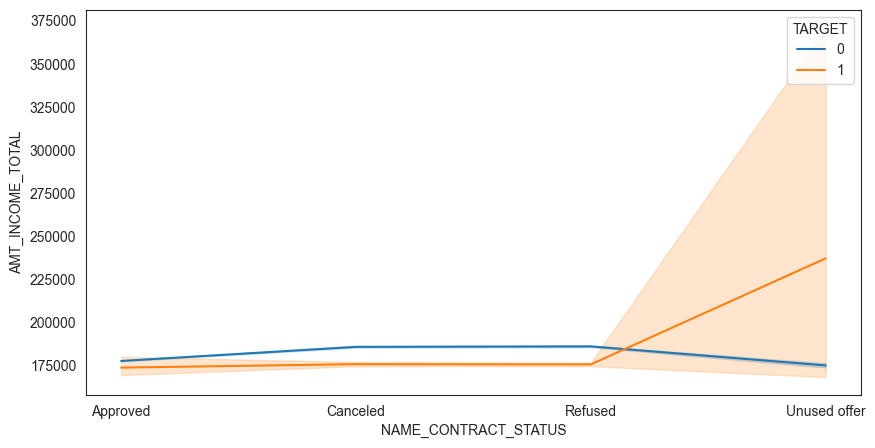

In [166]:
# Plotting lineplot of NAME_CASH_LOAN_PURPOSE by TARGET

sns.lineplot(data=df_merge,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',hue='TARGET')

- Offers which were usused previously, have the maximum number of defaulters in the current application despite of having higher incomes.

## Conclusion